# Should We Be on the Same Health Care Plan?

When an employer removes a health care plan option, it can leave an individual with fewer choices.
But given a domestic relationship, there is another option of deciding to join the second individual's plan.
But which is the better option - retaining separate plans, or being on the same plan?
Instead of focusing on what was lost (the plan no longer available) it might be more
productive to focus on options that are available - choosing a different plan offered by the 
employer, or having a shared plan. 

For some basic background, the plans simulated here are similar in that they both offer a health savings account (HSA), and then have a relatively reasonable monthly premium, along with a maximum out of pocket. As you might guess, when you add a second party to a single person's plan, the out of pocket maximum increases appropriately, the deductible doubles, and the monthly premium also increases.

Some caveats - this breakdown is specific to two similar plans offered by specific individual employers (not stated). As you read this, keep in mind that some expenses are covered at differenet rates (for example, preventative might be covered at 100%), that the calculation doesn't take into account tax benefits from HSA, and that there's other tax implications of being on the same plan as domestic partners that weren't covered here.

## The Challenge

We would want to be able to simulate different spending scenarios to determine which option might be better.

## Summary of Terms

Before we dive into equations, let's briefly review some of these terms. I am in no way an expert, so please excuse the generalizations.

### Health Savings Account 

A health savings account is basically a "triple tax advantage" account, which means that we don't pay taxes in three respects:

   - the contributions that I or my employer might make are not taxed
   - I'm allowed to invest the money (for example, buy stocks) and when I invest I don't pay taxes. 
   - when I make withdrawals I don't pay taxes

The catch is that you can only use it for healthcare, and there is a maximum contribution that we can make, set by the federal government [[ref](http://www.hsacenter.com/how-does-an-hsa-work/2019-hsa-contribution-limits/)].

### Premium

The premium comes down to how much is taken out of your paycheck each pay period (typically two weeks). This is independent of everything else - if you went through an entire year and didn't have a single medical charge, you'd still be paying for this. And you'd be receiving the HSA contribution in the same way.

### Deductible

The deductible (usually between 1 and 2k, and higher for families and couples) is the amount that you must pay out of pocket before insurance kicks in. For example, if I go to some doctor and have a $200 charge, if my deductible is $1750 I'll have to pay all of that. I can choose to use my HSA or not - in both cases it goes toward the deductible. The deductible is the maximum amount that you have pay (usually over a calendar year) before the insurance starts kicking in. [Here is a nice summary](https://www.ifebp.org/aboutus/pressroom/releases/Pages/Average-Health-Care-Deductible-Nearly-$1,500-for-Individual-Coverage-Through-an-Employer-Plan.aspx) of average healthcare deductibles.

### Out of Pocket Maximum

Of course if you were to go to the doctor 10 times, each time getting a charge of `$200`, you would eventually hit a total of `$2000`. Since this is above the deductible, insurance would have kicked in at the `$1751st` dollar. The remaining `$250` is now subject to the terms of your insurance for whatever is being charged. For example, let's say that I got a procedure that I can look up to see is covered 20%/80% by my insurance. This means that the insurance will (off the bat) cover `80%` of the charges, or 80% of `$250` (`$200`). This leaves `$50` (the `20%`) that I'm responsible for.  Now we can discuss out of pocket maximum. In a good year, you'll likely have tiny medical charges for check ups and various prescription medications. But let's say you have a horrific life event, and wind up in the Emergency Room with imaging, staying overnight, and a final bill that is `$150,000`. Ouch. It might still be the case that you insurance covers a `20/80%` split. This means that they will cover `80%` (or `$120,000`) and that leaves you with 20 percent or `$30,000`. Crap! This is where the out of pocket maximum kicks in. You would only pay up to your out of pocket maximum (depending on the type of insurance, this can vary a lot - I've seen between 3K and 7K) and then insurance is responsible for the rest. So, despite the `$150,000` bill, you would only pay (after the deductible and HSA) a maximum equal to your out of pocket maximum. The total expenses would be 

```
premiums - [HSA seed] + [out of pocket max]
```

## The Challenge

Now that we understand the general terms, you probably have a better sense for the challenge at hand. Having a shared plan will mean greater out of pocket maximums, and premiums, but could turn out to be a better deal given that involved parties both have serious medical expenses. You know, all it really takes is one unexpected trip to the ER with a nice ambulance ride to totally screw you (at least if you didn't have insurance!) With this in mind, I wanted to create a basic model for different spending scenarios. Let's start with imports, and functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Calculate Net Costs

This equation should take some medical expenses (an amount in dollars) and given:
 - an HSA seed
 - a deductible
 - a coverage rate (the percentage after the deductible that the insurance covers, e.g., 80%)
 - a maximum out of pocket expense (after deductible, given the remaining percentage that you are responsible for, the maximum that you will pay)
 - annual premium: the deduction from your paycheck each pay period for the insurance

In [2]:
def calculate_net_costs(medical_expenses,
                  hsa_seed=1000.0,
                  deductible=1350.0,
                  coverage_rate=0.9,
                  max_out_of_pocket=2700.0,
                  annual_premium=0.0):
    
    # What we pay up to the deductible
    expenses_before_deductible = min(deductible, medical_expenses)

    # The amount that is left over after the deductible (could be zero)
    expenses_after_deductible = max(0.0, medical_expenses - deductible)

    # Percentage of (after deductible) you are responsible for
    percentage_not_covered = (1 - coverage_rate)
    
    # What you pay out of pocket is the percentage not covered of remaining expenses
    out_of_pocket = expenses_before_deductible + expenses_after_deductible * percentage_not_covered

    # But we only pay up to the max out of pocket
    if out_of_pocket > max_out_of_pocket:
        out_of_pocket = max_out_of_pocket

    # And we also have to account for the hsa (money given to us) and the annual premium (what we pay)
    return out_of_pocket - hsa_seed + annual_premium

Now that we have an equation, we can calculate estimated out of pocket expenses for:
 - two individual parties at different companies (with the same structure but different numbers)
 - the combined parties if they go under the same insurance
 
 With the equations below, we can plug in some medical cost, and get the net costs.

In [3]:
# Out of pocket for hypothetical individual 1
out_of_pocket_person1 = lambda medical_expeses: calculate_net_costs(
    medical_expeses,
    hsa_seed=1000.0,
    deductible=1350.0,
    coverage_rate=0.9,
    max_out_of_pocket=2700.0,
    annual_premium=0.0)

# Out of pocket for hypothetical individual 2
out_of_pocket_person2 = lambda medical_expenses: calculate_net_costs(
    medical_expenses,
    hsa_seed=600.0,
    deductible=1750.0,
    coverage_rate=0.6,
    max_out_of_pocket=3750.0,
    annual_premium=1000.0)

# Person 1 and 2 get married / domestic partnership and use better of two insurance (person 1s)
out_of_pocket_person1_couple = lambda medical_expenses: calculate_net_costs(
    medical_expenses,
    hsa_seed=2000.0,
    deductible=2700.0,
    coverage_rate=0.9,
    max_out_of_pocket=5400.0,
    annual_premium=1875.0)

## Simulation

Now we want to generate a nice plot. For the plot, we basically want to compare (given different levels of expenses for person 1 and person 2) what the total net cost would be. For the plot below, each unit on an access maps to `$100` (so 20 on the plot is `$2000`) and this is the total cost that the couple pays, given the charges for person 1 and person 2, and given the plan.

In [24]:
def generate_plot(dollars_per_interval, N):

    # A matrix the same dimension as points on the axis, with each coordinate corresponding to
    # net costs for a scenario where person 1 (x)
    net_costs = np.empty((N, N))

    for i in range(N):
        for j in range(N):

            # Some theoretical cost, i or j times the dollar per interval, per individual
            person1_cost = dollar_per_interval * i
            person2_cost = dollar_per_interval * j

            # The combined cost, if considered together
            combined_cost = person1_cost + person2_cost

            # Update the out of pocket matrix - we want to (given the hypothetical charges above)
            # calculate what would be paid on a shared plan, minus what would be paid individualls
            # The shared plan would be cheaper in some cases (negative number), 
            # the individual plans cheaper in others (positive number)
            net_costs[i, j] = (

                # Cost of what would be paid on one plan
                out_of_pocket_person1_couple(combined_cost)

                # Subtracting costs that would be paid for individual plans
                - out_of_pocket_person1(person1_cost)
                - out_of_pocket_person2(person2_cost))
        
    print("Maximum more we would pay for the shared plan.")
    print(abs(max(net_costs.reshape(-1))))

    print("Maximum more we would pay for having individual plans.")
    print(abs(min(net_costs.reshape(-1))))

    # Force the scale to go from -max to max
    net_costs[0, 0] = -max(net_costs.reshape(-1))
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(net_costs, interpolation='nearest', cmap='bwr')
    ax.set_xlabel("Person 1 plan cost (x %s)" % dollar_per_interval)
    ax.set_ylabel("Person 2 plan cost (x %s)" % dollar_per_interval)
    ax.set_title("Out-of-pocket cost difference between joined and separate plans")
    fig.colorbar(cax)
    

# Plot Result

Now let's plot the above! In the plot:
 - a large positive value (red) indicates that the individual plans would be cheaper - and this happens because we subtract two smaller costs from a single larger one.
 - a large negative value (blue) indicates that the shared plan would be cheaper. This happens because we subtract two individual values from the shared value, and the sum of the individual costs is greater than the shared.

Maximum more we would pay for the shared plan.
1690.0
Maximum more we would pay for having individual plans.
1380.0


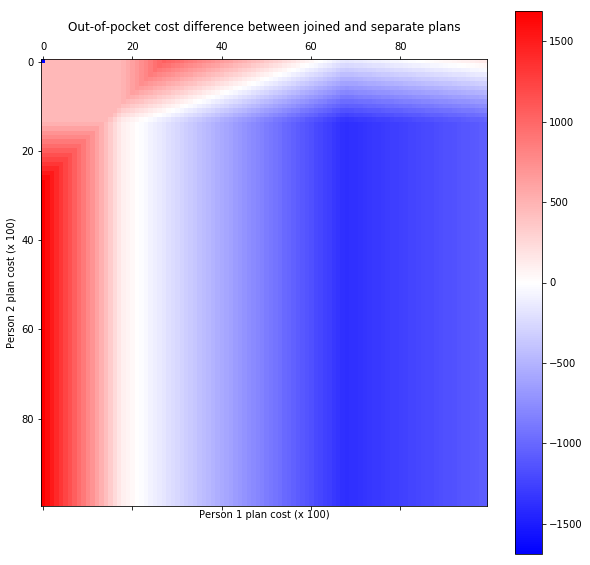

In [25]:
# First generate a plot with 100 points at $100 per interval (up to 10K)

N = 100  # Number of points per axis

# The number of dollars per interval (e.g., 20 on the plot = 20 * $100 or $2000)
dollars_per_interval = 100

generate_plot(dollars_per_interval, N)

## First Thoughts

Off the bat, you are probably seeing a lot of blue in the plot above, and thinking "Wow, it's much more cost effective to be on a shared plan. Now is where it gets tough, because you have to think about your particular life, and what we are seeing in the plot above. For the above plot, for the shared plan to be more cost effective, it would still require some situation like the following:

  - Person 1 gets charged 6K, person 2 is in perfect health and never goes to the doctor (unlikely)
  - Person 1 is charged 4K, person 2 goes above 2K for some summary, and then shared is also cheaper
  
But wait a minute - why don't we see the equivalent case for Person 2 - what maximum would they need to be charged? Also, 10K is pretty small in the scope of medical expenses. We've scoped our plot to be too small, and need to increase the axis.


Maximum more we would pay for the shared plan.
3175.0
Maximum more we would pay for having individual plans.
1380.0


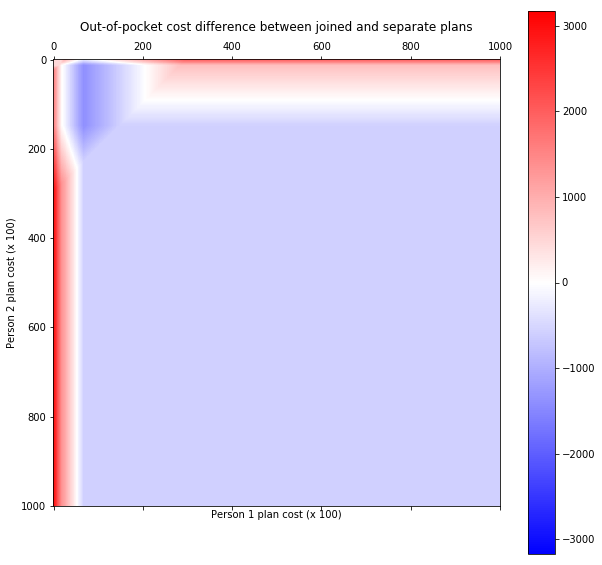

In [26]:
# Now generate a plot with 1000 points at $100 per interval (up to 100K)

N = 1000  # Number of points per axis

# The number of dollars per interval (e.g., 20 on the plot = 20 * $100 or $2000)
dollars_per_interval = 100

generate_plot(dollars_per_interval, N)

## Next Thoughts

Now we see a better plot, because we see more detail! And it gets interesting! This is of course my interpretration, but here is how I think about the above.

 - Your decision about to do a shared vs. individual plans comes down to where you think you fall on the plot.
 - The intermediate region (the square in the upper left) results because the sum of the two individual deductibles is higher than the deductible for a couple on the shared plan. 
 
I stared at this for a long time, and came down to this for my own conclusions. For the most part, the blue region (shared plan being cheaper) would be the case given that *both* individuals have high expenses. Let's say both people fall off a mountain, ride in the ambulance together to the ER, and get bills each over 20K. But now to think of actual experience, I would guess that (for most people) it's typically the case that one has some major thing once in every 5 years. To be conservative, let's actually assume that person 2's charges will be exhorbiant (Person 2 going to the bottom of the plot) and Person 1 stays well below a few thousand dollars. Or it could be that Person 2's charges remain low, and Person 1's remain low, or that Person 1 has huge charges, but Person 2 is low. In these (what seem to me to be likely) scenarios when there are huge charges for one person, and reasonable charges for another, or reasonable charges for both, it's always going to be cheaper to have individual insurance. On the flip side, if the people choose individual insurance (and then are wrong, and fall off a mountain) the maximum (more) that would be paid is `$1380`. If the people choose shared insurance and then have relatively low charges, the maximum (more) that would be paid (on the shared plan) is `$3175`.

### TLDR

The conclusion is that it depends on what your anticipated medical expenses are. If you expect to not have a lot of frequent, expensive procedures, then it makes sense to have separate insurance because even if one person maxes out, the other person is unlikely to max out.